<a href="https://www.kaggle.com/code/renatakuagowska/titanic-1-202209?scriptVersionId=108077780" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import tree

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# 1. Data Analysis

In [2]:
# Load data 

df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.isnull().sum()/len(df_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [10]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
df_test.isnull().sum()/len(df_test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

Note:

- lack of data : Age (about 20%), Cabin (77%), Embarked and Fare (below 0,1%)
- Age in range: 0,17-80 
- Fare in range : 0-512 


# 2. Feature Enginiering

In [12]:
# Merging data 

df=pd.concat([df_train,df_test],ignore_index=True)
print(df)

      PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

Missing data 
1. Embarked
2. Cabin 
3. Fare 
4. Age 

In [13]:
# Embarked 
px.histogram(df_train, x='Embarked',title='Embarked',width=600,height=300)

mostly from S that in this way we fill in gaps 

In [14]:
df_train= df_train.fillna({'Embarked':'S'})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


- Cabin 
- Cabin data begins with a letter then numbers. Do the letters represent the floors? or a specific part of the ship. Can be z parsed by letter.

In [16]:
df['cabin_l'] = df.Cabin.apply(lambda x: str(x)[0])

In [17]:
print(df.cabin_l.value_counts())

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_l, dtype: int64


In [18]:
print(df.groupby(["cabin_l"])["Survived"].value_counts(normalize=True))

cabin_l  Survived
A        0.0         0.533333
         1.0         0.466667
B        1.0         0.744681
         0.0         0.255319
C        1.0         0.593220
         0.0         0.406780
D        1.0         0.757576
         0.0         0.242424
E        1.0         0.750000
         0.0         0.250000
F        1.0         0.615385
         0.0         0.384615
G        0.0         0.500000
         1.0         0.500000
T        0.0         1.000000
n        0.0         0.700146
         1.0         0.299854
Name: Survived, dtype: float64


Noteworthy data, especially those with the letters D and E, B there 3 times more people survived. ??
The only question is why there are so many gaps in the data and whether these data mainly do not come from information from those who survived ??
This data will bot be taken under consideration becouse too much missing data - job above was done for training reason :) 

- Fare 

In [19]:
df[pd.isnull(df['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_l
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,n


Is one missing data in Fare column. The fee depends on the class. In this case it was class 3. so the grade 3 average will be calculated

In [20]:
pd.pivot_table(df_train,index= 'Pclass', values = ['Fare'])

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


average fare in class 3 was 13.67 and this amount will be fill in 

In [21]:
df_test['Fare'].fillna(value= 13.67,inplace=True)

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- Age- to try fill in age we will look at title in front of name. Calculate average of age per title  

In [23]:
df['Name'].map(lambda x:x.split(',')[1].split('.')[0].lower()).value_counts()

 mr              757
 miss            260
 mrs             197
 master           61
 rev               8
 dr                8
 col               4
 mlle              2
 major             2
 ms                2
 lady              1
 sir               1
 mme               1
 don               1
 capt              1
 the countess      1
 jonkheer          1
 dona              1
Name: Name, dtype: int64

In [24]:
x= df['Name'].map(lambda x:x.split(',')[1].split('.')[0].lower())

df.groupby(x)['Age'].agg([np.mean,np.median])

,mean,median
Name,,
capt,70.000000,70.0
col,54.000000,54.5
don,40.000000,40.0
dona,39.000000,39.0
dr,43.571429,49.0
jonkheer,38.000000,38.0
lady,48.000000,48.0
major,48.500000,48.5
master,5.482642,4.0


In [25]:
pop_title = ['mr','miss','mrs','master','dr','col']
df['Name'].map(lambda x:x.split(',')[1].split('.')[0].lower().strip()).map(lambda x:x if x in pop_title else 'other').value_counts()

mr        757
miss      260
mrs       197
master     61
other      22
dr          8
col         4
Name: Name, dtype: int64

In [26]:
df_train['Title']= df['Name'].map(lambda x:x.split(',')[1].split('.')[0].lower().strip()).map(lambda x:x if x in pop_title else 'other')
df_test['Title']= df['Name'].map(lambda x:x.split(',')[1].split('.')[0].lower().strip()).map(lambda x:x if x in pop_title else 'other')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,miss
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,mrs
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,mr


In [27]:
title_mapping = {'mr':0, 'miss':1, 'mrs':2, 'master':3, 'other':4, 'dr':5, 'col':6}
df_train['Title']=df_train['Title'].map(title_mapping)
df_test['Title']=df_test['Title'].map(title_mapping)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [28]:
#for data in df_train:
#   data.loc[(data['Age']== 'NaN') & (data['Title'] == 0),'Age']=29,
#   data.loc[(data['Age']== 'NaN') & (data['Title'] == 1),'Age']=22,
#   data.loc[(data['Age']== 'NaN') & (data['Title'] == 2),'Age']=35,
#   data.loc[(data['Age']== 'NaN') & (data['Title'] == 3),'Age']=4,
#   data.loc[(data['Age']== 'NaN') & (data['Title'] == 4),'Age']=39,
#   data.loc[(data['Age']== 'NaN') & (data['Title'] == 5),'Age']=49,
#   data.loc[(data['Age']== 'NaN') & (data['Title'] == 6),'Age']=54,

In [29]:
# df_train = df_train["Age"].fillna(df_train.groupby("Title")["Age"].transform("median"), inplace=True)
# df_test = df_test['Age'].fillna(df_test.groupby('Title')['Age'].transform('median'), inplace=True)

In [30]:
# df_test = df_test.fillna(df_train.Age.mean())
# df_train = df_train.fillna(df_train.Age.mean())

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


-- TO LOOK - IMPROVE 

-- x1=x1.map({'col':54,'dr':49,'master':4,'miss':22,'mr':29,'mrs':35,'rev':41,'other':39})

# 3.Visualization
- frequency

In [33]:
def plotone(variable):
    #input : variable (agevs)
    
    varr = df_train[variable]
    varrcounter = varr.value_counts()
    plt.figure(figsize = (9,3))
    plt.bar(varrcounter.index,varrcounter)
    plt.xticks(varrcounter.index,varrcounter.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: /n {}".format(variable,varrcounter))

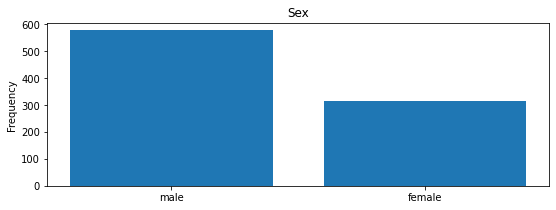

Sex: /n male      577
female    314
Name: Sex, dtype: int64


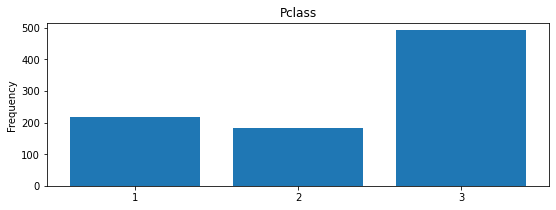

Pclass: /n 3    491
1    216
2    184
Name: Pclass, dtype: int64


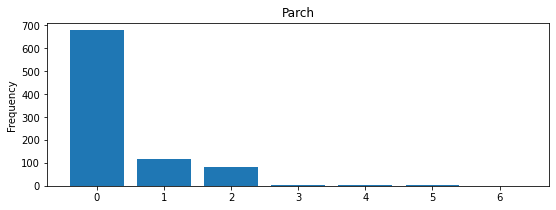

Parch: /n 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


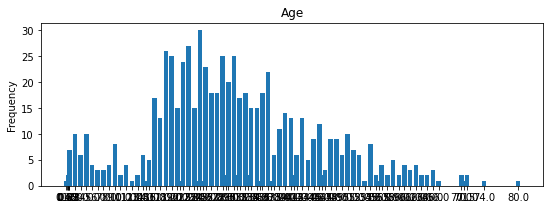

Age: /n 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


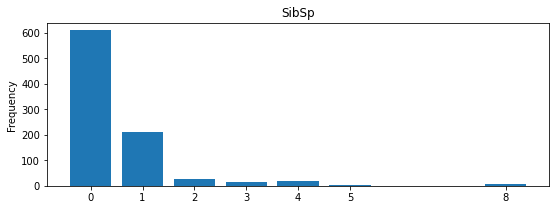

SibSp: /n 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


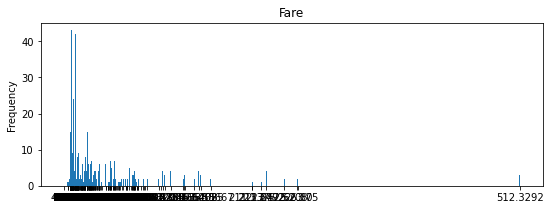

Fare: /n 8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


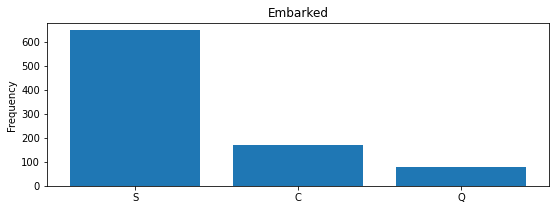

Embarked: /n S    646
C    168
Q     77
Name: Embarked, dtype: int64


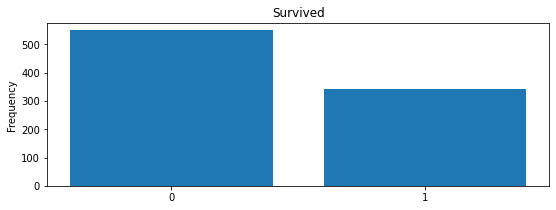

Survived: /n 0    549
1    342
Name: Survived, dtype: int64


In [34]:
cate = ["Sex","Pclass","Parch", "Age", "SibSp", "Fare","Embarked", "Survived"]

for xxx in cate:
    plotone(xxx)

Note:
- much more male then female,
- most in class 3
- mostly without parents and child
- most come from S

- corelation

In [35]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.014884
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.398648
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.192399
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.086474
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.246119
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.285755
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.134005
Title,0.014884,0.398648,-0.192399,-0.086474,0.246119,0.285755,0.134005,1.000000


<AxesSubplot:>

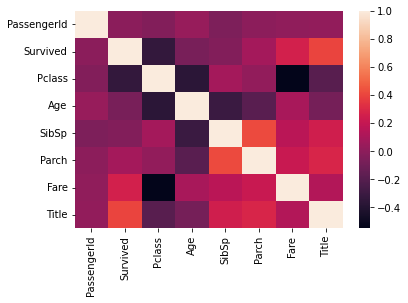

In [36]:
sns.heatmap(df_train.corr())

Note:


- who survived

In [37]:
pd.pivot_table(df_train,index= 'Survived', values = ['Age','SibSp','Parch','Fare','Pclass'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


Note:
who had a better chance of survival:
- youngest ? 
- who paid more? 
- if you traveled with your parents?
- in business class?
- no children / with fewer children?

- categorical data 

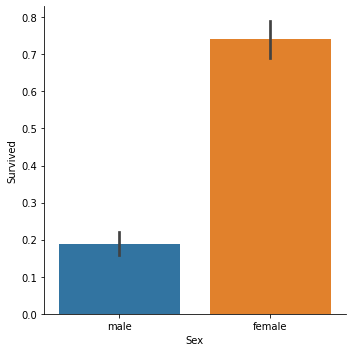

In [38]:
sns.catplot(data=df_train, x='Sex', y='Survived',kind='bar')

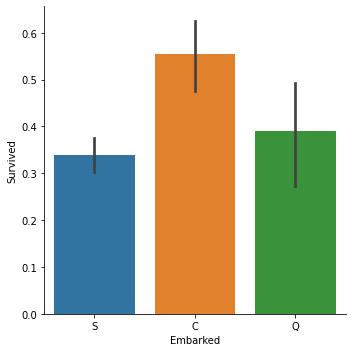

In [39]:
sns.catplot(data=df_train, x='Embarked', y='Survived',kind='bar')

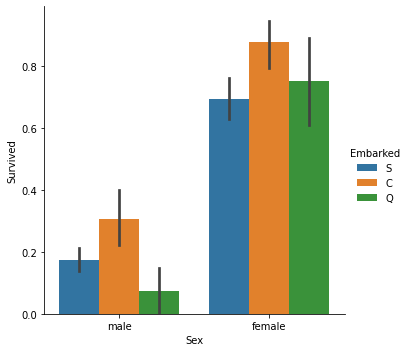

In [40]:
sns.catplot(data=df_train, x='Sex', y='Survived',kind='bar', hue='Embarked')

In [41]:
print(pd.pivot_table(data=df_train, index ='Survived', columns = 'Sex', values ='Ticket',aggfunc= 'count'  ))

Sex       female  male
Survived              
0             81   468
1            233   109


In [42]:
print(pd.pivot_table(data=df_train, index ='Survived', columns = 'Embarked', values ='Ticket',aggfunc= 'count'  ))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


In [43]:
print(df_train.groupby(["Pclass","Sex"])["Survived"].value_counts(normalize=True))

Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64


Conclusions

- Women were more likely to survive
- Passengers from C = Cherbourg had a better chance, interestingly, 
- men from C = Cherbourg had a disproportionately lower chance

# 3. Preprocesing

In [44]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_l
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C


In [45]:
# Create age bins

df_train['AgeBin']= pd.cut(x=df_train.Age, bins=5, labels=[0,1,2,3,4])
df_test['AgeBin']= pd.cut(x=df_train.Age, bins=5, labels=[0,1,2,3,4])

In [46]:
# 4
df_train['FareBin']= pd.cut(x=df.Fare, bins=4, labels=[0,1,2,3])
df_test['FareBin']= pd.cut(x=df.Fare, bins=4, labels=[0,1,2,3])
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBin,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2,0


In [47]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBin,FareBin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,2,0


In [48]:
df_test = df_test.drop(['Name','Ticket','Cabin','Age','Fare'],axis=1)
df_train = df_train.drop(['Name','Ticket','Cabin','Age','Fare'],axis=1)
df_train.head(2)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeBin,FareBin
0,1,0,3,male,1,0,S,0,1,0
1,2,1,1,female,1,0,C,2,2,0


In [49]:
df_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeBin,FareBin
0,892,3,male,0,0,Q,0,1,0
1,893,3,female,1,0,S,2,2,0
2,894,2,male,0,0,Q,1,1,0
3,895,3,male,0,0,S,2,2,0
4,896,3,female,1,1,S,0,2,0


LabelEncoder 

In [50]:
le= preprocessing.LabelEncoder()

cols= ['Sex', 'Embarked']

for col in cols:
    df_train[col]=le.fit_transform(df_train[col])
    df_test[col]=le.transform(df_test[col])
    print(le.classes_)
    
df_train.head()

['female' 'male']
['C' 'Q' 'S']


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeBin,FareBin
0,1,0,3,1,1,0,2,0,1,0
1,2,1,1,0,1,0,0,2,2,0
2,3,1,3,0,0,0,2,1,1,0
3,4,1,1,0,1,0,2,2,2,0
4,5,0,3,1,0,0,2,0,2,0


# Models 

In [51]:
target = df_train['Survived']
data = df_train.drop('Survived', axis=1)
data.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,AgeBin,FareBin
0,1,3,1,1,0,2,0,1,0
1,2,1,0,1,0,0,2,2,0
2,3,3,0,0,0,2,1,1,0
3,4,1,0,1,0,2,2,2,0
4,5,3,1,0,0,2,0,2,0


In [52]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.25,random_state=42)

In [53]:
print(x_train[:3])

     PassengerId  Pclass  Sex  SibSp  Parch  Embarked  Title AgeBin FareBin
298          299       1    1      0      0         2      0    NaN       0
884          885       3    1      0      0         2      0      1       0
247          248       2    0      0      2         2      2      1       0


In [54]:
print(x_test[:3])

     PassengerId  Pclass  Sex  SibSp  Parch  Embarked  Title AgeBin FareBin
709          710       3    1      1      1         0      3    NaN       0
439          440       2    1      0      0         2      0      1       0
840          841       3    1      0      0         2      0      1       0


In [55]:
print(y_train[:3])

298    1
884    0
247    1
Name: Survived, dtype: int64


In [56]:
print(y_test[:3])

709    1
439    0
840    0
Name: Survived, dtype: int64


In [57]:
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(668, 9) (223, 9) (668,) (223,)


# 

# Models 
1. Naive Bayes
2. Random Forest 
3. Logistic Regression
4. Decision Tree
5. K- nearest Neighbour
6. SVM - Support Vector machine


# 1. Naive Bayes

In [58]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [59]:
model.score(x_train,y_train)

0.6212574850299402

cross validation

In [60]:
model = GaussianNB()
cv = cross_val_score(model,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61940299 0.61940299 0.61940299 0.62406015 0.62406015]
0.6212658511951521


# 2. Random forest



In [61]:
classifier = RandomForestClassifier(random_state=42)

classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [62]:
classifier.score(x_train,y_train)

1.0

cross validation

In [63]:
model = RandomForestClassifier(random_state=42)
cv = cross_val_score(model,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76865672 0.76865672 0.79104478 0.7593985  0.81954887]
0.7814611154752553


In [64]:
y_pred_RF= classifier.predict(x_test)

# 3. Logistic regression

In [65]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(x_train, y_train)
prediction = clf.predict(x_test)
accuracy_score(y_test,prediction)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.600896860986547

cross validation

In [66]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818

[0.61940299 0.61940299 0.61940299 0.62406015 0.62406015]
0.6212658511951521


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# 4.Decision Tree

In [67]:
classifier = DecisionTreeClassifier(max_depth=4, random_state=42)
classifier.fit(x_train,y_train)
classifier.score(x_train,y_train)

0.8502994011976048

cross validation

In [68]:
dt = tree.DecisionTreeClassifier(max_depth=4,random_state = 1)
cv = cross_val_score(dt,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.80597015 0.79104478 0.7761194  0.80451128 0.81203008]
0.7979351363483336


# 5. K-nearest neighbour

In [69]:
classifier = KNeighborsClassifier()
classifier.fit(x_train,y_train)
classifier.score(x_train,y_train)

0.7380239520958084

cross validation

In [70]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.58208955 0.53731343 0.58955224 0.57894737 0.47368421]
0.5523173605655931


# 6. SVM - Support Vector machine

In [71]:
classifier = SVC(probability = True)
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

0.600896860986547

cross validation

In [72]:
svc = SVC(probability = True)
cv = cross_val_score(svc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61940299 0.61940299 0.61940299 0.62406015 0.62406015]
0.6212658511951521


# Tune 
- grid search
- randomized search - for random forest 

In [73]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

Tune NA for Naive Batyes and Decision Tree

In [74]:
test_ids = df_test["PassengerId"]
sub_pred =  classifier.predict(df_test)


submission = pd.DataFrame({"PassengerId": test_ids.values, "Survived": sub_pred})
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
